In [17]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [18]:
# set up file names and pathes
dataDir='/home/ubuntu/obj2text-neuraltalk2/coco-caption/coco-caption'
dataType='val2014'
algName = 'area_and_width'
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)

In [19]:
import unicodedata
import collections

# continue set up file names and pathes
with open('/home/ubuntu/obj2text-neuraltalk2/project_results/%s.json'%(algName), 'r') as f:
        original_results = json.load(f)        
        
resFile = original_results['val_predictions']

with open('/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName), 'w') as f:
        json.dump(resFile, f)

resFile = '/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(algName)

In [20]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:00.740164
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!


In [21]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 31063, 'guess': [31408, 28208, 25008, 21808], 'testlen': 31408, 'correct': [21225, 10174, 4338, 1896]}
ratio: 1.01110646106
Bleu_1: 0.676
Bleu_2: 0.494
Bleu_3: 0.348
Bleu_4: 0.246
computing METEOR score...
METEOR: 0.226
computing Rouge score...
ROUGE_L: 0.495
computing CIDEr score...
CIDEr: 0.817


In [22]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.817
Bleu_4: 0.246
Bleu_3: 0.348
Bleu_2: 0.494
Bleu_1: 0.676
ROUGE_L: 0.495
METEOR: 0.226


length of evals 1164
ground truth captions
Cauliflower, carrots, and broccoli are arranged in a vegetable bowl.
A plate filled with broccoli, carrots and cauliflower.
A bowl of baby carrots, cauliflower and broccoli pieces. 
carrots, broccoli, and cauliflower on a plate 
Carrots, cauliflower and broccoli sitting in a clear container.


generated caption (CIDEr score 0.1)
a plate of food with a variety of vegetables


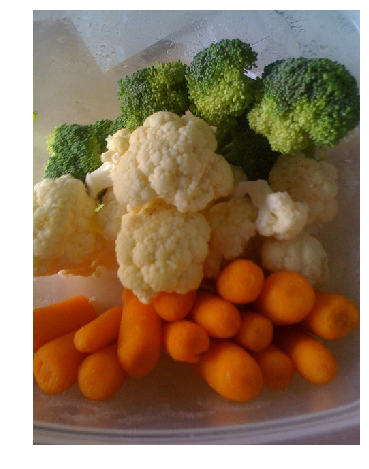

In [23]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<.5]
print 'length of evals', len(evals)
print 'ground truth captions'
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('/home/ubuntu/obj2text-neuraltalk2/coco/images/%s/%s'%(dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

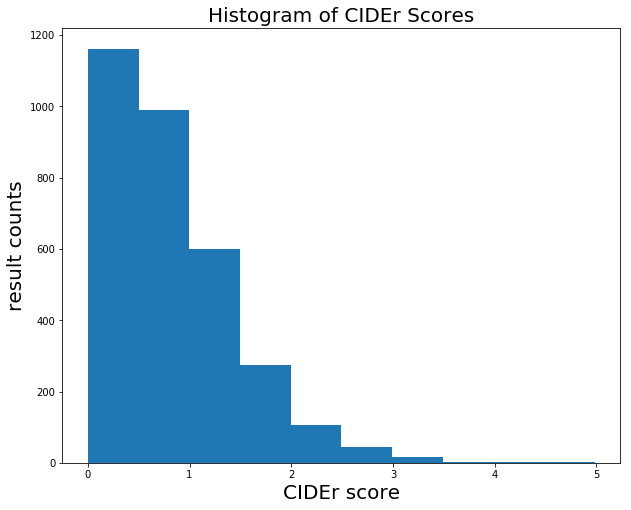

In [24]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()